This assignment is collaborated by **Jingting Dai** and **Hongjie Guan**. **Jingting finished A04.1 and Hongjie finished A04.2,04.3.** 

# A04.1 Community detection

In [132]:
import networkx as nx
import networkx.algorithms.community as nxcom
import itertools
import os
import matplotlib.pyplot as plt
import numpy as np

In [17]:
def import_datasets(datasets_folder):
    d={} #empty dictionary
    for item in os.listdir(datasets_folder):
        if 'gml'in item and 'random' not in item:
            item_path = os.path.join(datasets_folder,item)
            item_name = item.split("_",1)[1].split(".")[0] 
            print("dataset named "+item_name+" imported")
            d["{}".format(item_name)] = nx.read_gml(item_path)
    print("finish importing")
    return d

In [18]:
graphs = import_datasets('data-assignment4-update')

dataset named dolphins imported
dataset named jazz_collab imported
dataset named karate imported
finish importing


In [19]:
graphs

{'dolphins': <networkx.classes.graph.Graph at 0x227845644f0>,
 'jazz_collab': <networkx.classes.graph.Graph at 0x2278760f2b0>,
 'karate': <networkx.classes.graph.Graph at 0x227875a1430>}

## Task: For the given networks find the communities using (a) the greedy modularity maximization by Clauset Newman and Moore and (b) the Girvan-Newman algorithm. Assign to each community a color and draw the resulting graph.

## (a) Clauset Newman and Moore algorithm

In [20]:
comm_CNM = {}
for name, graph in graphs.items():
    cnm = sorted(nxcom.greedy_modularity_communities(graph), key=len, reverse=True)
    comm_CNM[name] = cnm

In [21]:
#add community to node attributes
#return {node: community number}
def cnm_community_nodes(graph, comm):
    d = {}
    for community,nodes in enumerate(comm):
        for node in nodes:
            graph.nodes[node]['community'] = community + 1
            d[node] = graph.nodes[node]['community']
    return d

In [22]:
#community for all 3 datasets
community_graphs = {}
for name, graph in graphs.items():
    community = cnm_community_nodes(graph, comm_CNM[name])
    community_graphs[name] = community

In [23]:
community_to_color = {
    1 : 'red',
    2 : 'green',
    3 : 'blue',
    4 : 'yellow',
}

In [24]:
#node color by community for all 3 datasets
community_node_color = {}
for name, graph in graphs.items():
    node_color = {node: community_to_color[community_id] for node, community_id in community_graphs[name].items()}
    community_node_color[name] = node_color

In [25]:
def plot_community(name, graph):
    plt.figure(figsize=(12,12))  
    plt.title("Clauset Newman and Moore: dataset " + name)
    nx.draw(graph,with_labels=True,node_color = [community_node_color[name][v] for v in graph.nodes()],node_size=80,font_size=10)
    plt.show()
    print("Number of communities: " + str(max(community_graphs[name].values())))

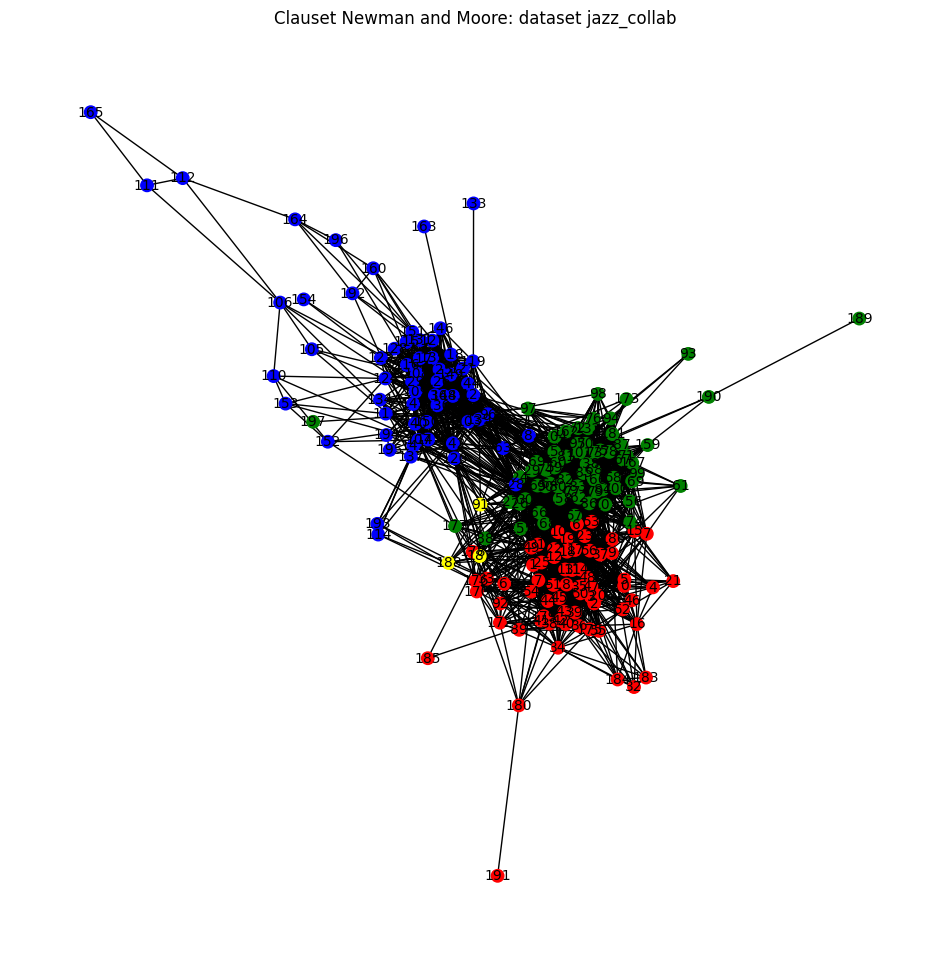

Number of communities: 4


In [26]:
plot_community('jazz_collab',graphs['jazz_collab'])

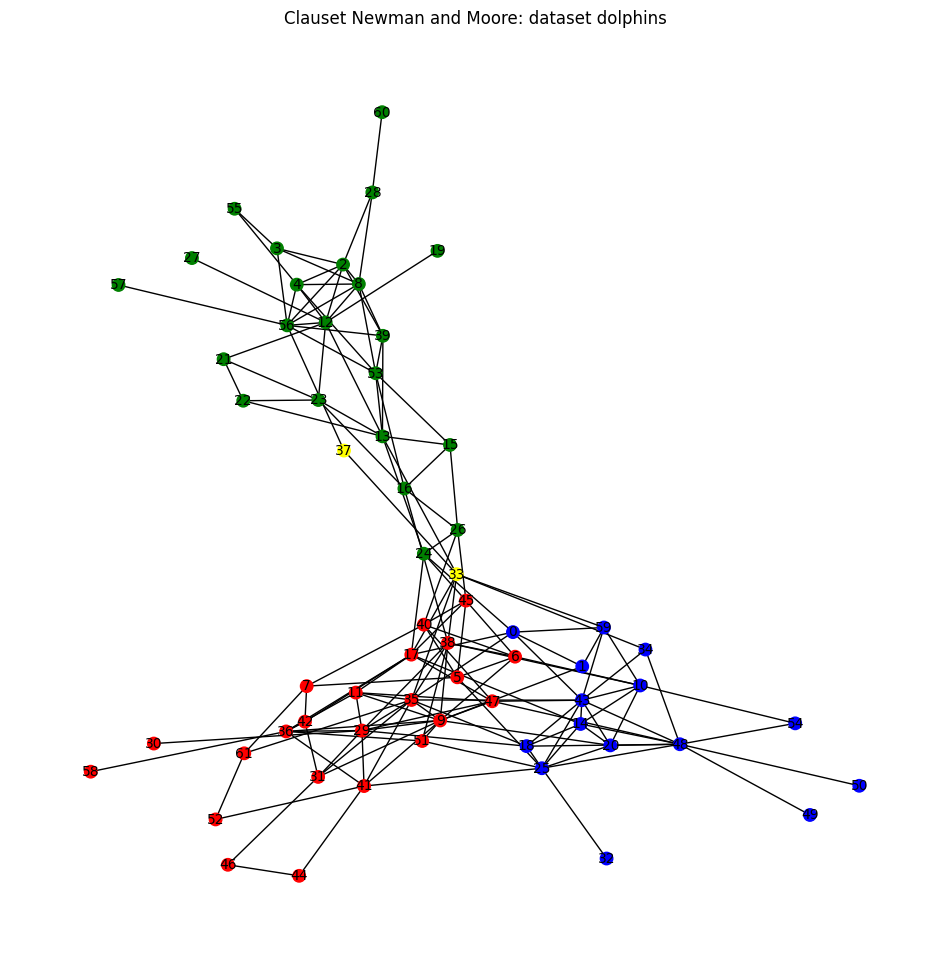

Number of communities: 4


In [27]:
plot_community('dolphins',graphs['dolphins'])

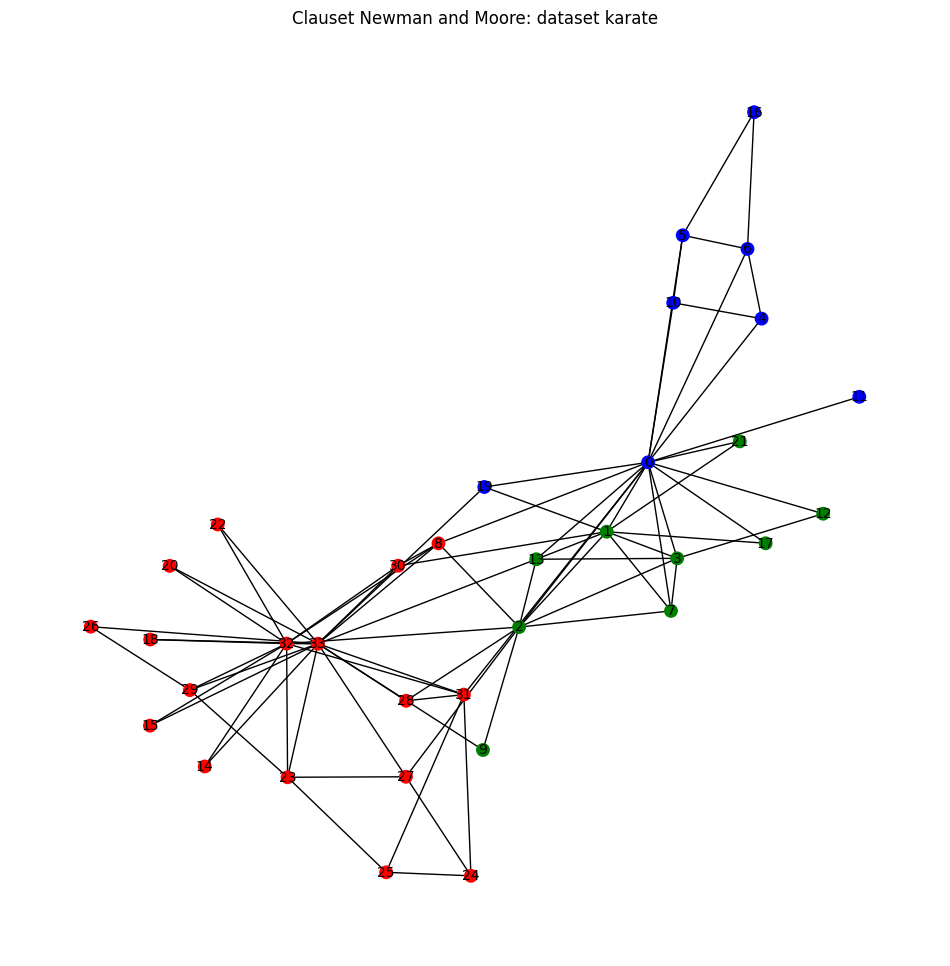

Number of communities: 3


In [28]:
plot_community('karate',graphs['karate'])

## (b) the Girvan-Newman algorithm

In [29]:
#get communities by finding max modularity in k communities
#stop getting tuples of communities once the number of communities is greater than k
#set k = 20
def gn_community(graph):
    k = 20
    communities = nxcom.girvan_newman(graph)
    limited = itertools.takewhile(lambda c: len(c) <= k, communities)
    d = {}
    for communities in limited:
        comm = tuple(sorted(c) for c in communities)
        mod = nxcom.modularity(graph,comm)
        d[mod] = comm
    max_modularity = max(d.keys())
    community_GN = d[max_modularity]
    
    return community_GN

In [30]:
#add community to node attributes
#return {node: community number}
def gn_community_nodes(graph, c):
    d = {}
    for community,nodes in enumerate(c):
        for node in nodes:
            graph.nodes[node]['community'] = community + 1
            d[node] = graph.nodes[node]['community']
    return d

In [31]:
#community for all 3 datasets
communityGN_graphs = {}
for name, graph in graphs.items():
    communityGN = gn_community_nodes(graph, gn_community(graph))
    communityGN_graphs[name] = communityGN

In [32]:
def plot_GNcommunity(name, graph):
    plt.figure(figsize=(12,12))  
    plt.title("Girvan-Newman: dataset " + name)
    nx.draw(graph,with_labels=True,node_color = [communityGN_graphs[name][v] for v in graph.nodes()],node_size=80,font_size=10)
    plt.show()
    print("Number of communities: " + str(max(communityGN_graphs[name].values())))

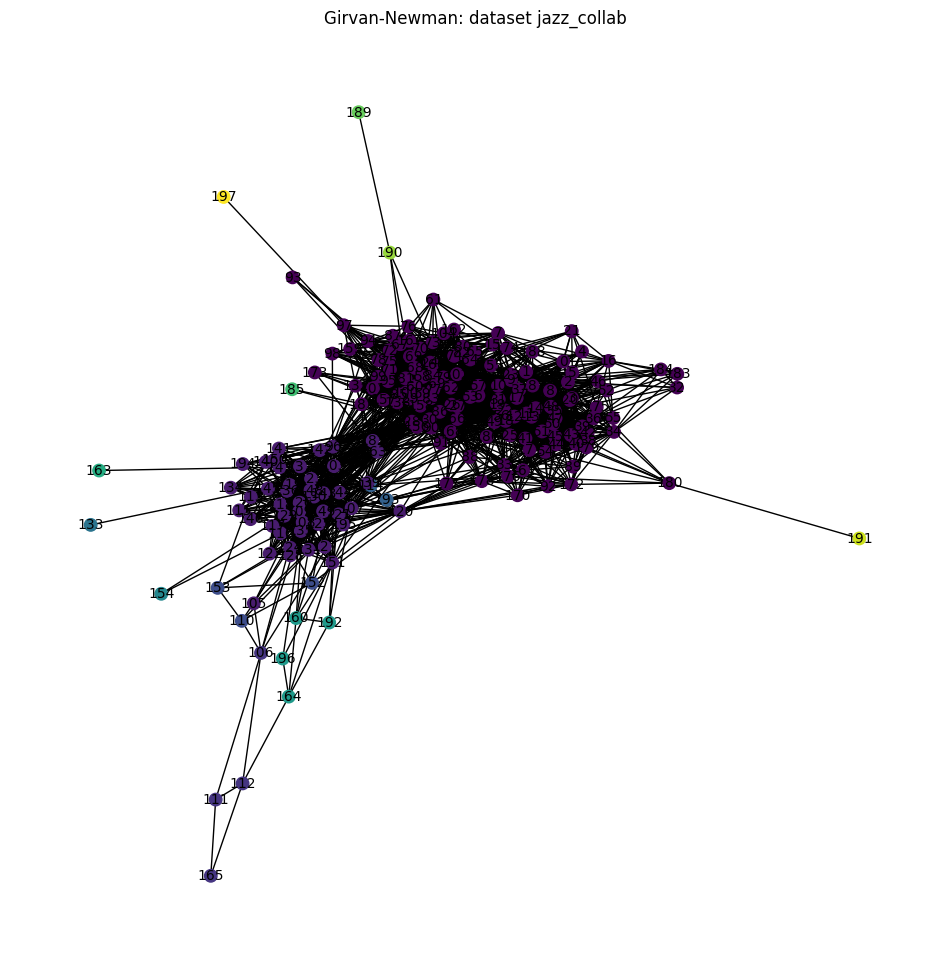

Number of communities: 14


In [33]:
plot_GNcommunity('jazz_collab',graphs['jazz_collab'])

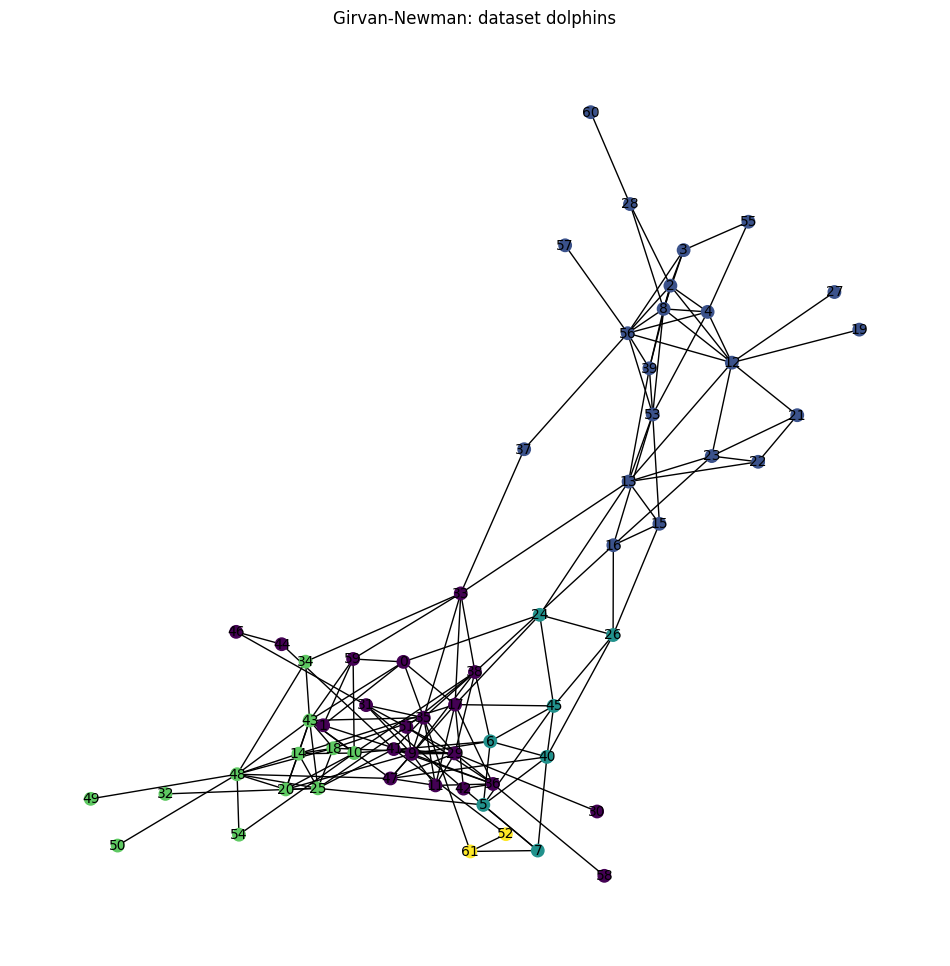

Number of communities: 5


In [34]:
plot_GNcommunity('dolphins',graphs['dolphins'])

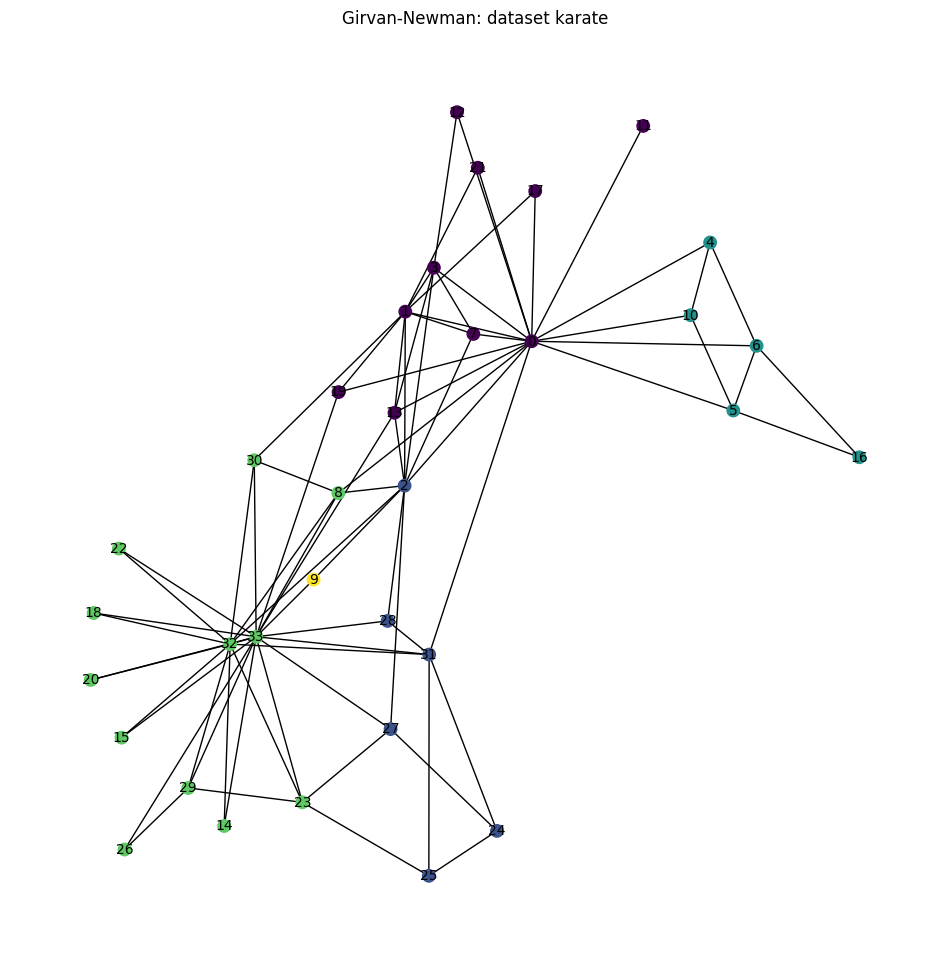

Number of communities: 5


In [35]:
plot_GNcommunity('karate',graphs['karate'])

## Task: Randomise each network and compare the number of communities obtained before and after randomisation.

In [36]:
#randomise function
#input must be imported gml dictionary
def randomise(networks):
    d={}
    for i in networks:
        d["grnd_{0}".format(i)] = nx.algorithms.smallworld.random_reference(
            networks[i],niter = 20, connectivity=False)
    return d

In [37]:
#randomised datasets dictionary
rnd_gs = randomise(graphs)

## (a) Clauset Newman and Moore algorithm

In [38]:
comm_CNM_rnd = {}
for name, graph in rnd_gs.items():
    cnm_rnd = sorted(nxcom.greedy_modularity_communities(graph), key=len, reverse=True)
    comm_CNM_rnd[name] = cnm_rnd

In [39]:
#community for all 3 randomised datasets
community_graphs_rnd = {}
for name, graph in rnd_gs.items():
    community_rnd = cnm_community_nodes(graph, comm_CNM_rnd[name])
    community_graphs_rnd[name] = community_rnd

In [40]:
for i in community_graphs:
    print(f'With Clauset Newman and Moore algorithm, the original {i} network has {max(community_graphs[i].values())} communities, \
the randomised {i} network has {max(community_graphs_rnd["grnd_" + i].values())} communities')

With Clauset Newman and Moore algorithm, the original dolphins network has 4 communities, the randomised dolphins network has 8 communities
With Clauset Newman and Moore algorithm, the original jazz_collab network has 4 communities, the randomised jazz_collab network has 4 communities
With Clauset Newman and Moore algorithm, the original karate network has 3 communities, the randomised karate network has 7 communities


## (b) the Girvan-Newman algorithm

In [41]:
#community for all 3 randomiseddatasets
communityGN_graphs_rnd = {}
for name, graph in rnd_gs.items():
    communityGN_rnd = gn_community_nodes(graph, gn_community(graph))
    communityGN_graphs_rnd[name] = communityGN_rnd

In [42]:
for i in communityGN_graphs:
    print(f'With Girvan-Newman algorithm, the original {i} network has {max(communityGN_graphs[i].values())} communities, \
the randomised {i} network has {max(communityGN_graphs_rnd["grnd_" + i].values())} communities')

With Girvan-Newman algorithm, the original dolphins network has 5 communities, the randomised dolphins network has 20 communities
With Girvan-Newman algorithm, the original jazz_collab network has 14 communities, the randomised jazz_collab network has 2 communities
With Girvan-Newman algorithm, the original karate network has 5 communities, the randomised karate network has 5 communities


# A04.2 Erdos-Renyi random networks


### Task: Generate three Erdos-Renyi networks with 𝑁 = 500 nodes and average degree (a) ⟨𝑘⟩ = 0.3, (b) ⟨𝑘⟩ = 1 and (c) ⟨𝑘⟩ = 2.5. Visualize these networks.


For Binomial distribution, the P_k peaks at <k>=p(N-1)

#### (a) ⟨𝑘⟩ = 0.3

In [110]:
N=500

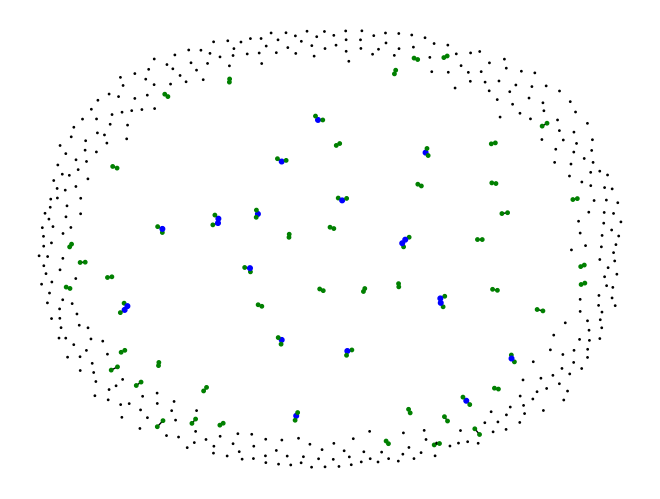

In [126]:
ERnetworks_a = nx.erdos_renyi_graph(500, 0.3/(N-1))
degree = dict(ERnetworks_a.degree)
color_map = []
for d in degree.values():
    if d ==0:
        color_map.append('black')#black dot for node with degree 0 
    elif 0<d<2:
        color_map.append('green')#green dot for node with degree 1
    elif 1<d<4:
        color_map.append('blue') #blue dot for node with degree 2,3
    else: 
        color_map.append('red')  #red dot for node with degree 4 or over 4

nx.draw(ERnetworks_a,node_color=color_map,node_size=[v*5+1 for v in degree.values()])

#### (b) ⟨𝑘⟩ = 1

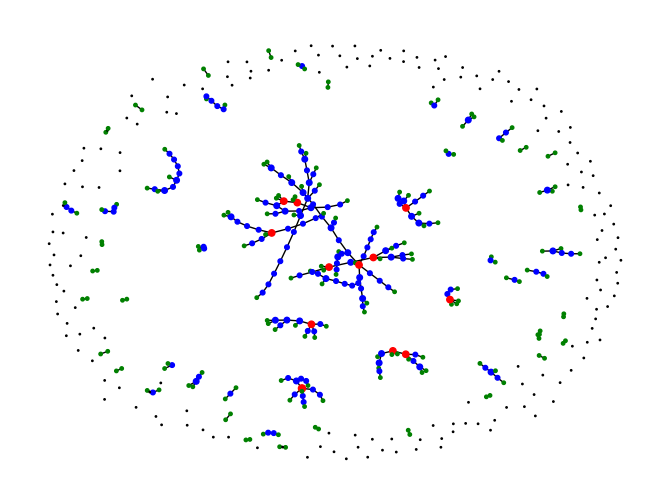

In [128]:
ERnetworks_b = nx.erdos_renyi_graph(500, 1/(N-1))
degree = dict(ERnetworks_b.degree)
color_map = []
for d in degree.values():
    if d ==0:
        color_map.append('black')#black dot for node with degree 0 
    elif 0<d<2:
        color_map.append('green')#green dot for node with degree 1
    elif 1<d<4:
        color_map.append('blue') #blue dot for node with degree 2,3
    else: 
        color_map.append('red')  #red dot for node with degree 4 or over 4

nx.draw(ERnetworks_b,node_color=color_map,node_size=[v*5+1 for v in degree.values()])

#### (c) ⟨𝑘⟩ = 2.5

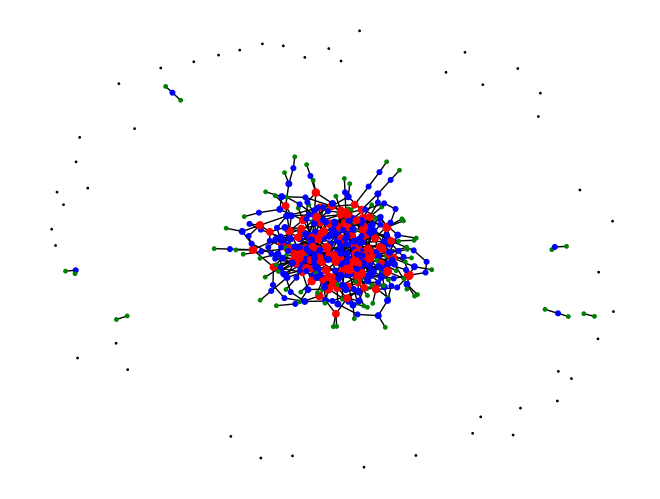

In [188]:
ERnetworks_c = nx.erdos_renyi_graph(500, 2.5/(N-1))
degree = dict(ERnetworks_c.degree)
color_map = []
for d in degree.values():
    if d ==0:
        color_map.append('black')#black dot for node with degree 0 
    elif 0<d<2:
        color_map.append('green')#green dot for node with degree 1
    elif 1<d<4:
        color_map.append('blue') #blue dot for node with degree 2,3
    else: 
        color_map.append('red')  #red dot for node with degree 4 or over 4

nx.draw(ERnetworks_c,node_color=color_map,node_size=[v*5+1 for v in degree.values()])


Here I didn't use nv.spring_layout because it did't help visualization.

### Task: Generate ER graphs with 𝑁 = 200 nodes for different edge creation probabilities 𝑝 ∈ [0, 1] and:

### 1. Plot the average fraction of nodes in the largest connected component ⟨𝑁_𝐺/𝑁⟩ as a function of 𝑝 and mark with a vertical line the critical probability 𝑝𝑐 = 1/𝑁

In [130]:
N=200

In [201]:
import networkx as nx

In [203]:
def avg(lst):
    return sum(lst) / len(lst)

p_range=np.logspace(-3, -1, num=200)
avg_cluster_list=[]
avg_S_list=[]
for p in p_range:
    cluster_list=[]
    S_list=[]
    for i in range(0,100):
        graph = nx.erdos_renyi_graph(N, p)
        cluster = nx.average_clustering(graph)
        N_G=len(max([c for c in nx.connected_components(graph)],key=len))
        cluster_list.append(cluster)
        S_list.append(N_G/N)
    avg_cluster_list.append(avg(cluster_list))
    avg_S_list.append(avg(S_list))
    

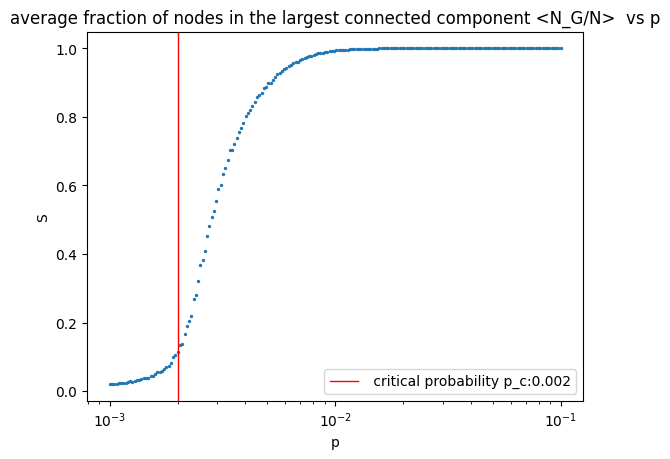

In [204]:
plt.scatter(p_range,avg_S_list,s=2 )
plt.xscale('log')
plt.yscale('linear')
plt.xlabel('p')
plt.ylabel('S')
p_c=1/N
plt.axvline(p_c, color='r', linestyle='-', linewidth=1,label=" critical probability p_c:{}".format(p_c))
plt.title("average fraction of nodes in the largest connected component <N_G/N>  vs p")
plt.legend()
plt.show()

### 2. Plot the average clustering ⟨𝐶⟩ as a function of 𝑝 and give an interpretation of the result

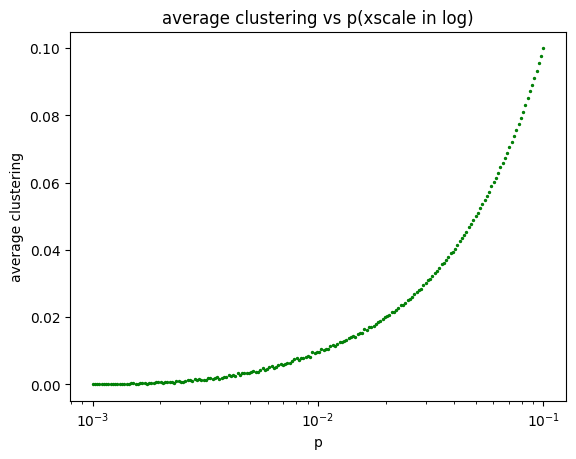

In [205]:
plt.scatter(p_range,avg_cluster_list,s=2,edgecolors="green" )
plt.xscale('log')
plt.yscale('linear')
plt.xlabel('p')
plt.ylabel('average clustering')
plt.title("average clustering vs p(xscale in log)")
plt.show()

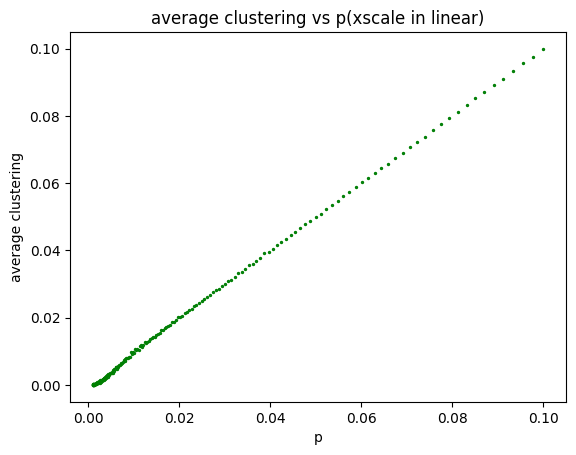

In [206]:
plt.scatter(p_range,avg_cluster_list,s=2,edgecolors="green" )
plt.xscale('linear')
plt.yscale('linear')
plt.xlabel('p')
plt.ylabel('average clustering')
plt.title("average clustering vs p(xscale in linear)")
plt.show()

#### Interpretation:
The average clustering is identical and should be identical to p in ER graph because average clustering is the probability of having the third edge u-v in a triangle given there are edges u-i and v-i. And in ER graph, between every two nodes, there will be a edge under the probability p, so average clustering in ER graph should be p.

# A04.3 Small-world with high clustering
Task: Generate many WS small-world networks with 𝑁 = 150 nodes and fixed number of neighbors for each node 2𝜅 = 12. As a function of the rewiring probability 𝑝, using both linear and logarithmic scale for the 𝑝-axis:

### 1. Plot the average clustering ⟨𝐶(𝑝)⟩/⟨𝐶(0)⟩ and check if it correctly reproduces the analytical result 
$⟨𝐶(𝑝)⟩ ≈\frac{3}{2}\frac{(𝜅 − 1)}{(2𝜅 − 1)}(1 − 𝑝)^3$

In [232]:
def avg(lst):
    return sum(lst) / len(lst)

N=150
k=12

p_range=np.logspace(-4, 0, num=200)
avg_cluster_coefficient_list=[]
avg_shortest_path=[]
avg_C_p_list=[]

for p in p_range:
    
    original_graph=nx.watts_strogatz_graph(N, k=k, p=0)
    C_0=nx.average_clustering(original_graph)
    D_0=nx.average_shortest_path_length(original_graph)
    graph = nx.watts_strogatz_graph(N, k=k, p=p)
    C_p_list=[]
    cluster_coefficient_list=[]
    shortest_path_list=[]
    for i in range(0,100):
        #calculate C_p
        C_p=nx.average_clustering(graph)
        C_p_list.append(C_p)
        
        # calculate clustering coefficients
        
        cluster_coefficient = C_p/C_0
        cluster_coefficient_list.append(cluster_coefficient)
    
        #calculate shortest path-length
        D_p=nx.average_shortest_path_length(graph)
        path_lenth = D_p/D_0
        shortest_path_list.append(path_lenth)
    
    avg_C_p_list.append(avg(C_p_list))
    avg_cluster_coefficient_list.append(avg(cluster_coefficient_list))
    avg_shortest_path.append(avg(shortest_path_list))

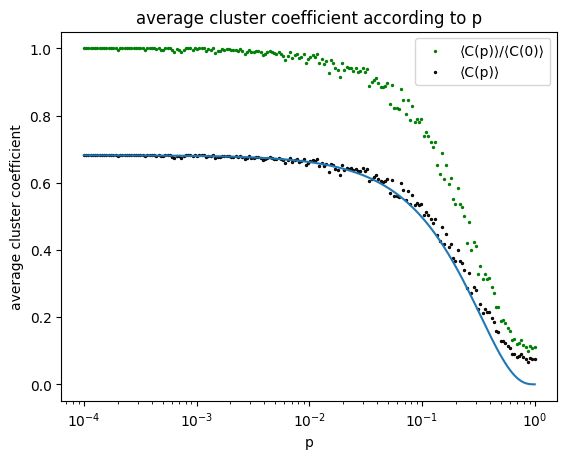

In [236]:
f_range=[(3/2)*((k/2-1)/(k-1))*((1-p)**3) for p in p_range]
plt.scatter(p_range,avg_cluster_coefficient_list,s=2,edgecolors="green" ,label="⟨C(p)⟩/⟨C(0)⟩")
plt.scatter(p_range,avg_C_p_list,s=2,edgecolors="black",label="⟨C(p)⟩")
plt.plot(p_range,f_range)
plt.xscale('log')
plt.yscale('linear')
plt.xlabel('p')
plt.ylabel('average cluster coefficient')
plt.title("average cluster coefficient according to p")
plt.legend(loc="best")
plt.show()

So here we have $⟨𝐶(𝑝)⟩ ≈\frac{3}{2}\frac{(𝜅 − 1)}{(2𝜅 − 1)}(1 − 𝑝)^3$ especially when p goes to 0. 

### 2. Plot the average shortest-path length 𝐷(𝑝)/𝐷(0)


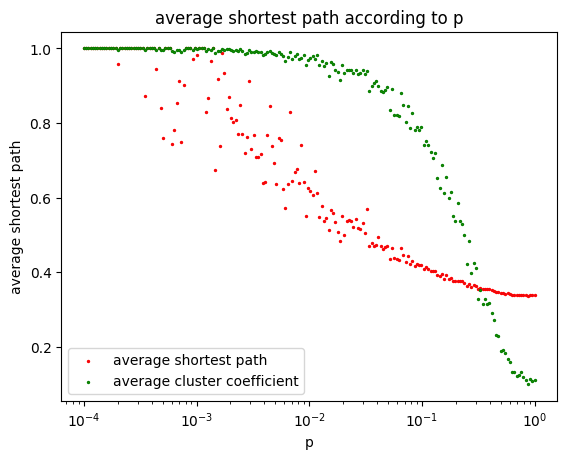

In [234]:
plt.scatter(p_range,avg_shortest_path,s=2,edgecolors="red",label="average shortest path" )
plt.scatter(p_range,avg_cluster_coefficient_list,s=2,edgecolors="green",label="average cluster coefficient" )
plt.xscale('log')
plt.yscale('linear')
plt.xlabel('p')
plt.ylabel('average shortest path')
plt.title("average shortest path according to p")
plt.legend(loc="best")
plt.show()